# 回归分析

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

plt.style.use("fast")

## 1. 模型检验

### 1.1. 线性回归

广义上的线性回归，包括线性回归和多项式回归，其目的是找到一条直线或曲线，并以最小的误差来拟合数据，回归的核心就是寻找**误差的最小值**。

> 回归分析的前提是，$𝑿_i$相互独立，$𝒀$服从高斯分布

对于简单线性回归，其总体回归线可表示为

$$
𝒀 = θ_0 + θ_1𝑿 + ϵ,\ ϵ ∈ 𝒩(0, σ^2)
$$

其中，$ϵ$为均值为$0$的随机误差，其简化形式为

$$
𝒀 ≈ θ_0 + θ_1𝑿
$$

这里，$θ_0$和$θ_1$为未知常量，被称为模型的系数（coefficient）或参数（parameter）。通过训练数据，对其进行估计，即可得到想要的预测值：

$$
ŷ = \hat{θ}_0 + \hat{θ}_1 x
$$

此处使用最常用的残差平方和（residual sum of squares，RSS）来度量误差（error），用$e_i = y_i - ŷ_i$表示第$i$个残差（residual），则

$$
\mathrm{\mathrm{RSS}} = ∑e_i^2 = ∑(y_i - ŷ_i)^2
$$


### 1.2. 系数偏差

一般来说，样本均值可提供对总体均值的良好估计，用$μ̂$和$μ$分别表示样本均值和总体均值，则$μ̂$对$μ$的估计必须是无偏的（unbiased）。通常使用标准误差（standard error，SE）来测量二者之间的偏差（bias）：

$$
\mathrm{D}(μ̂) = \mathrm{SE}(μ̂)^2 = \frac{σ^2}n
$$

其中，σ 是每个$y_i$值的标准差，前提是样本服从独立同分布。显然，样本量越大，$\mathrm{SE}(μ̂)$越小。同理，可利用下面的公式计算$θ_0$和$θ_1$的 SE：

$$
\begin{gathered}
  \mathrm{SE}(\hat{θ}_0)^2 = σ^2 \big[\dfrac1n + \dfrac{x̄^2}{∑(x_i - x̄)^2} \big] \\
  \mathrm{SE}(\hat{θ}_1)^2 = \dfrac{σ^2}{∑(x_i - x̄)^2}
\end{gathered}
$$

要使式$(2.1)$严格成立，需要每个$e_i$独立，并有相等的$σ^2$。一般情况下，$σ^2$是未知的，但可利用残差标准误（residual standard error，RSE）进行估计：

$$
\mathrm{RSE} = \sqrt{\mathrm{RSS}/(n - 2)}
$$


### 1.3. _t_ 检验

_t_ 检验一般可评估不同预测因素的重要性，设模型的残差关于 0 呈高斯分布。若残差不以这种方式表现，则说明变量之间存在一定的非线性，其 _t_ 检验不应该用于评估各个预测因子的重要性。

SE 可用于计算置信区间（confidence intervals，CI）。对于线性回归模型，$θ_0$和$θ_1$的 CI 分别为：

$$
\begin{aligned}
  \hat{θ}_1 ± 2⋅\mathrm{SE}(\hat{θ}_1) \\
  \hat{θ}_0 ± 2⋅\mathrm{SE}(\hat{θ}_0)
\end{aligned}
$$

SE 也可用于对系数进行设检验，检验$𝑿$和$𝒀$的相关性：

$$
H_0: θ_1 = 0
$$

计算$t$的统计量：

$$
t = \frac{\hat{θ}_1 - 0}{\mathrm{SE}(\hat{θ}_1)}
= \hat{θ}_1*\frac{\sqrt{∑(𝑿 - 𝑿̂)^2}}{\mathrm{Cov}(𝑿, 𝒀)}
∼ t_{n - 2}
$$

## 2. 相关性


### 2.1. 拟合程度

通常情况下，式$(2.3)$中的$\mathrm{RSE}$可作为模型欠拟合（underfitting）的度量。但由于它是以$𝒀$的单位度量的故并不清楚构成良好的$\mathrm{RSE}$的要素有哪些。由

$$
SS_{tot} = SS_{mod} + SS_{res}
$$

其中，

- $SS_{tot} = ∑(y_i - ȳ)^2$，是总平方和，相当于样本方差乘以$n - 1$。
- $SS_{mod} = ∑(ŷ_i - ȳ)^2$是模型平方和或回归平方和，有时也被称为“可解释平方和”。
- $SS_{res} = ∑(y_i - ŷ_i)^2$是残差平方和，即误差的平方和。

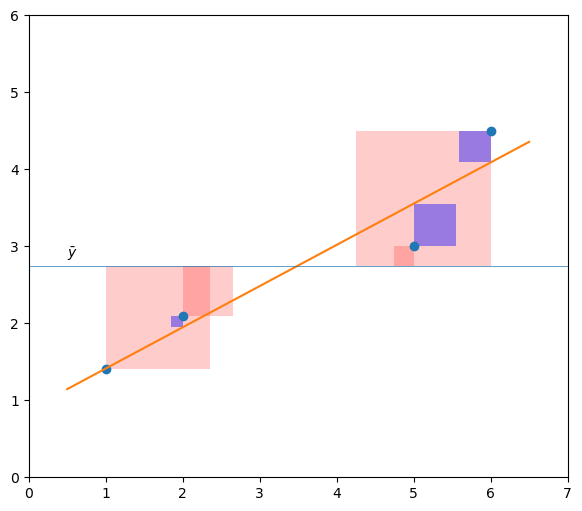

In [2]:
def scatters(x):
    return 1 + 0.5 * x


x = np.r_[1.0, 2.0, 5.0, 6.0]
y = scatters(x) + np.r_[-0.1, 0.1, -0.5, 0.5]

reg = np.polyfit(x, y, 1)
x_fit = np.linspace(0.5, 6.5, 101)
y_fit = np.polyval(reg, x_fit)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y, "o")
ax.plot(x_fit, y_fit)

ax.set(xlim=[0, 7], ylim=[0, 6])
ax.set_aspect("equal")
ax.hlines(np.mean(y), 0, 7, lw=0.5)
ax.text(0.5, np.mean(y) + 0.1, r"$\bar{y}$", fontsize="medium")

for i in range(len(y)):
    width = np.mean(y) - y[i]
    rect = Rectangle((x[i], y[i]), width=width, height=width, facecolor="r", alpha=0.2)
    ax.add_patch(rect)

for i in range(len(y)):
    width = np.polyval(reg, x[i]) - y[i]
    rect = Rectangle((x[i], y[i]), width=width, height=width, facecolor="b", alpha=0.4)
    ax.add_patch(rect)

plt.show()



如图，红色、蓝色面积分别代表$SS_{mod}$和$SS_{res}$。由此，决定系数$R^2$的定义为

$$
R^2 ≡ 1 - \frac{SS_{res}}{SS_{tot}} = \frac{SS_{mod}}{SS_{tot}}
$$

$\mathrm{R^2}$反映$y$变异中由$x$引起的变异占总变异的比例，即$\mathrm{R^2}$测量的是$𝒀$变异中可被$𝑿$解释的部分。对于评估模型的质量，许多研究者更倾向于调整后的$R^2$值，即

$$
1 - R̄^2 = \frac{SS_{res} /(n -k)}{SS_{tot} /(n - 1)}
$$

其可由如下式计算

$$
\begin{aligned}
  R̄^2 &= 1 - \frac{SS_{res}}{SS_{tot}} \frac{n-1}{n - k} \\
  &= 1 - (1 - R^2) \frac{n-1}{n - k}
\end{aligned}
$$

$\mathrm{R^2}$接近于$0$表示回归没有解释太多响应变量的变异，这可能是由于线性模型是错误的，也可能是由于$σ^2$较大。将多大的$R^2$值视为"好"取决于规则。通常它在物理科学中比在生物学或社会科学中更大。在金融或营销方面，它还取决于被建模的内容。

> 注意：若独立变量和因变量之间存在非线性关系，则样本相关性和$R^2$会产生误导。

### 2.2. 相关性系数

对于两个相关的变量，相关性系数（correlation coefficient）度量两个变量之间的关联。而线性回归则是用于从一个变量预测另一个变量的值。

若这两个变量呈高斯分布，则确定相关系数的标准测量通常使用 Pearson 系数：

$$
r_{𝑿𝒀} = \frac{Cov(𝑿, 𝒀)}{\sqrt{D(𝑿)}\sqrt{D(𝒀)}}
$$

1. $r_{𝑿𝒀} > 0$，两总体正相关
2. $r_{𝑿𝒀} = ±1$，两总体完全线性相关
3. $r_{𝑿𝒀} = 0$，两总体不相关
4. 相互独立 ⇒ 非线性相关

> 事实上，在简单线性回归中，$R^2 = r^2$。

若数据分布不是高斯分布，就需要使用不同的方法。在这种情况下，可对每个变量的数据集进行排序，并比较排序情况。

有两种常用的计算秩相关的方法。Spearman's $ρ$与 Pearson 相关系数 $r$完全相同，但计算的是观测值的排序，而非原始数字。

$$
ρ = 1 - \frac{∑d_i^2}{\binom{n+1}{3}}
$$

Kendall's $τ$亦为一个秩相关系数，测量两个测量量之间的关联。它比 Spearman's $ρ$更难计算，但有人认为其的置信区间更可靠，可解释性更好。

$$
τ = \frac{C-D}{\binom{n}{2}}
$$

### 2.3. _F_ 检验

记线性模型的系数为$θ_i$

$H_0: θ_i = 0$

构造 _F_ 值

$$
\begin{aligned}
  F &= \frac{(SS_{mod} / σ^2) / dof_{mod}}{(SS_{res} / σ^2) / dof_{res}} \\
  &= \frac{SS_{mod} / dof_{mod}}{SS_{res} / dof_{res}} \\
  &= \frac{MS_{mod}}{MS_{res}}
\end{aligned}
$$

若$H_0$为真，则 _F_ 值服从自由度为$\mathrm{(dof_{mod}, dof_{res})}$的 _F_ 分布，并独立于$σ$。

> $F = t^2$


# 回归分析

## 3. 拟合度检验

又称残差分析。

![correlation](images/ch06/correlation.png)

### 3.1. Omnibus 检验

Omnibus 检验使用偏度（skewness）和峭度（kurtosis）来研究残差，检验高斯分布的零假设。偏度是分布不对称性的度量，峭度是其曲率的度量，特别是曲线的指向。

若获得的 $p$ 值非常小，则残差通常不会分布在零附近，应该更仔细地看一下模型。

对于高斯分布的数据，偏度大约是 3。为方便起见，可使用超值峭度（excess kurtosis），其定义为$\mathrm{kurtosis} - 3$，以确保其高斯分布的值等于零。

### 3.2. Jarque-Bera 检验

Jarque-Bera 检验，类似 Omnibus 检验。零假设是分布是正态的，偏度和超值峭度都等于 0。不幸的是，对于小样本，Jarque-Bera 检验很容易拒绝零假设。

- $H_0$: 分布是正态的，偏度和超值峭度都等于 0。


### 3.3. Durbin-Watson 检验

Durbin-Watson 检验用于检测残差中是否存在自相关（通过给定的时间滞后相互分离的数值之间的关系）。


### 3.4. d'Agostino-Pearson 检验

`stats.normaltest()` 采用该检验。其结合了偏度和峰度检验，以生成单个全局"综合"统计数据。


## 5. 问题点检测

### 5.1. 残差图

残差图（residual plot）分别以拟合值$ŷ_i$和残差$e_i$（或残差的开方）为横纵坐标轴，可用于检查数据的非线性。

- 若存在明显规律，则暗示线性模型存在着某一方面的问题。
- 若呈漏斗型，说明存在异方差性（heteroscedasticity），可试着对$y$做对数或开方变换缓解。

### 5.2. 离群点

产生离群点的原因有很多，如数据收集过程中某个实例的错误记录。残差图可识别离群点，但实践中，确定残差多大的点为离群点十分困难。此处使用学生化残差（studentized residual）代替残差，将其绝对值 >3 的点定义为离群点。

### 5.3. 高杠杆点

高杠杆点（high leverage）表示$x_i$异常的点。高杠杆点比离群点对 OLS 的影响更大。为量化杠杆作用，可计算杠杆统计量。对简单线性回归有：

$$
h_i = \frac{1}{n} + \frac{(x_i - x̄)^2}{∑_{i' = 1}^n(x_{i'} - x̄)^2} ∈ \big[\frac{1}{n}, 1\big]
$$

所有实例的平均杠杆值$h̄ = (p + 1) / n$，若$h_i > h̄$，则对应点可能为高杠杆点，可使用学生化残差 - 杠杆值图检测。

## 6. 共线性

### 6.1. 方差膨胀因子

共线性（colinearity）指两个或多个预测器高度相关。共线性会导致$\mathrm{SE}(\hat{θ}_i)$增大，导致$t$统计量下降。多重共线性（multi-colinearity）会导致矩阵求逆失败，或产生不准确的结果。

当存在多重共线性时，可使用方差膨胀因子（variance inflation factor，VIF）检测。VIF 是拟合全模型的$D(\hat{θ})$除以单变量回归中$D(\hat{θ}_i)$所得的比例：

$$
\mathrm{VIF}(\hat{θ}_i) = \frac{1}{1 - R_{𝑿_i | 𝑿_{-i}}^2}
$$

其中，$R_{𝑿_i | 𝑿_{-i}}^2$是$𝑿_i$对所有预测器回归的$R^2$，若前者接近 $1$，则存在共线性，此时 VIF 很大。经验法则是$\mathrm{VIF} > 5 | 10$，即可认为存在共线性。这种情况下，不需要对$R^2$大小妥协。

### 6.2. 条件数

第二种检测方法是条件数，条件数用于度量函数输出对其输入的灵敏度。若条件数>30，则回归可能具有多重共线性。

设$x$是真实解，$x_c$是计算解，定义

误差向量：$e ≡ x - x_c$
残差向量：$r ≡ b - 𝑨𝒙_c$

虽然希望得到零误差，但实际情况是，当使用浮点数时，最好预期是机器$ε$的相对误差。另一个复杂因素是，对于大多数问题，我们不知道$x$，因此无法计算$e$。但，残差是我们可计算的。随后的所有内容都基于使用残差来确定或估计计算解决方案中的误差的目标。即

$$
r = 𝑨e → e = 𝑨^{-1}r
$$

:::{admonition} 定理

设$𝑨$非奇异，$𝑩$非零，则

$$
\frac{∥e∥}{∥x∥} ⩽ κ(𝑨) \frac{∥r∥}{∥b∥}
$$

其中，$κ(𝑨)$是$𝑨$的条件数，定义为

$$
κ(𝑨) ≡ ∥𝑨∥ * ∥𝑨^{-1}∥
$$

:::

上述定理表明，若相对残差很小，则相对误差很小。得出这个结论的要求是条件数不是很大。具有大条件数的矩阵是病态的。因为条件数 ≥ 1（这在下面证明），病态的$𝑨$的条件可写为$1 ≪ κ(𝑨)$。

对于对角阵

$$
κ(𝑨) = \frac{d_{\max}}{d_{\min}}
$$

这表明，对于这个矩阵，条件数不会受到$d_i$的大小的影响，而是它们之间的差。

:::{admonition} 定理

设$𝑨$和$𝑷$可逆，则以下成立

- $κ(𝑰) = 1$，其中，𝑰 是单位阵
- $1⩽ κ(𝑨) < ∞$
- $∀α ≠ 0$，$κ(α𝑨) = κ(𝑨)$
- $κ(𝑨) = κ(𝑨 - 1)$
- $κ(𝑷𝑨) ⩽ κ(𝑷)κ(𝑨)$

:::

条件数在确定矩阵方程的求解精度方面起着重要作用。使用$κ$来指定这个数字。若公式适用于任何范数，则将没有下标，而若结果取决于使用的范数，则将使用下标，如$κ_{∞}(𝑨)$。

对

$$
𝑨 =
\begin{bmatrix}
a & b \\ c & d
\end{bmatrix}
$$

若$ad - bc ≠ 0$，则有

$$
𝑨^{-1} = \frac{1}{ad - bc}
\begin{bmatrix}
d & - b \\ -c & a
\end{bmatrix}
$$

$$
∥𝑨∥_{∞} = \max \{|x| + |y|, |c| + |d|\}
$$

$$
∥𝑨^{-1}∥ = \frac{1}{|ad - bc|} \max \{|d| + |y|, |c| + |x|\}
$$

设

$$
𝑨 =
\begin{bmatrix}
1 & 2 \\ -1 & d
\end{bmatrix}
$$

- $d = 1: κ_∞(𝑨) = 3$
- $d = 5: κ_∞(𝑨) = 6$
- $d = 20: κ_∞(𝑨) = 21$

![cond](images/ch06/cond-num.png)

用$𝑨$作用于单位圆（$x^2 + y^2 = 1$）的$x$，可得到相应的椭圆。对于较小的条件数值，$𝑨$不会明显扭曲单位圆。但对于较大的值，扭曲会十分明显。


### 6.3. 处理方法

常用处理方法是岭回归。

> 机器学习不要求特征之间必须独立，必须不相关，只要不是高度相关或精确相关就好。